In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

DATABASES=["7TAMI_ROI_CON_SYM", "7TAMI_ROI_PARK_SYM"]
MODALITIES=["T1map", "QSM", "wTSC2","fa", "R2s", "adc"]
ATLAS="parc_L_R_5lab"

df = []

for MODALITY in MODALITIES:
    for DATABASE in DATABASES:
        for i in range(1,14):
            if is_non_zero_file(DATABASE+"/derivatives/metrics/sub-%03d/sub-%03d_T1map_"%(i,i)+ATLAS+"_"+MODALITY+".csv")==True:
                sub = pd.read_csv(DATABASE+"/derivatives/metrics/sub-%03d/sub-%03d_T1map_"%(i,i)+ATLAS+"_"+MODALITY+".csv", delim_whitespace=True)
                sub['Database']=DATABASE
                sub['ID']='%03d'%i
                sub['Segmentation']="Direct_qT1_"+ATLAS
                sub['Modality']=MODALITY
                
                df.append(sub)
        
            if is_non_zero_file(DATABASE+"/derivatives/metrics/sub-%03d/sub-%03d_T1map_QSM_R2s_"%(i,i)+ATLAS+"_multi_"+MODALITY+".csv")==True:
                sub = pd.read_csv(DATABASE+"/derivatives/metrics/sub-%03d/sub-%03d_T1map_QSM_R2s_"%(i,i)+ATLAS+"_multi_"+MODALITY+".csv", delim_whitespace=True)
                sub['Database']=DATABASE
                sub['ID']='%03d'%i
                sub['Segmentation']="Direct_qT1/QSM/R2*_"+ATLAS
                sub['Modality']=MODALITY
    
                df.append(sub)

            if is_non_zero_file(DATABASE+"/derivatives/metrics/sub-%03d/sub-%03d_7TAMIbrain_192_All_MALF20_"%(i,i)+ATLAS+"_"+MODALITY+".csv")==True:
                sub = pd.read_csv(DATABASE+"/derivatives/metrics/sub-%03d/sub-%03d_7TAMIbrain_192_All_MALF20_"%(i,i)+ATLAS+"_"+MODALITY+".csv", delim_whitespace=True)
                sub['Database']=DATABASE
                sub['ID']='%03d'%i
                sub['Segmentation']="MALF_qT1_"+ATLAS
                sub['Modality']=MODALITY
    
                df.append(sub)
    
big_frame = pd.concat(df, ignore_index=True)


#Volumes

df = []

for DATABASE in DATABASES:
    for i in range(1,14):
        if is_non_zero_file("VBA_NEW2/metrics/"+DATABASE+"/sub-%03d/sub-%03d_T1map_QSM_R2s_"%(i,i)+ATLAS+".csv")==True:
            sub = pd.read_csv("VBA_NEW2/metrics/"+DATABASE+"/sub-%03d/sub-%03d_T1map_QSM_R2s_"%(i,i)+ATLAS+".csv")
                   
            sub['Database']=DATABASE
            sub['Segmentation']="Direct_qT1/QSM/R2*_"+ATLAS
            sub['ID']='%03d'%i

            df.append(sub)
            
df = pd.concat(df, ignore_index=True)

big_frame = pd.merge(big_frame, df, on=['Label','ID','Database','Segmentation'], how='left')

mymap = {1:"Snc_Left", 2:"SNr_Left", 3:"STh_Left", 4:"RN_Left", 5:"Nigrosome_Left", 6:"Snc_Right", 7:"SNr_Right", 8:"STh_Right", 9:"RN_Right", 10:"Nigrosome_Right",}
big_frame = big_frame.applymap(lambda s: mymap.get(s) if s in mymap else s)


#z-score

for Modality in MODALITIES:
    for Label in ['Snc_Left', 'SNr_Left', 'STh_Left', 'RN_Left', 'Nigrosome_Left', 'Snc_Right', 'SNr_Right', 'STh_Right', 'RN_Right', 'Nigrosome_Right']:
        filter = (big_frame['Label'] == Label) & (big_frame['Modality'] == Modality) & (big_frame['Database'] == '7TAMI_ROI_CON_SYM') & (big_frame['Segmentation'] == "Direct_qT1/QSM/R2*_"+ATLAS)
        filter1 = (big_frame['Label'] == Label) & (big_frame['Modality'] == Modality) & (big_frame['Segmentation'] == "Direct_qT1/QSM/R2*_"+ATLAS)
        
        big_frame.loc[filter1,'z-score'] = (big_frame[filter1]['Mean'] - big_frame[filter]['Mean'].mean()) / big_frame[filter]['Mean'].std()
    
big_frame.to_csv('data.csv')


#Exclude subjects:

filter_CON = (big_frame['Database']!='7TAMI_ROI_CON_SYM')|(((big_frame['Modality']!='T1map')|(big_frame['ID']!='003'))&((big_frame['Modality']!='wTSC2')|(big_frame['ID']!='006')))
big_frame = big_frame[filter_CON]

filter_PARK = (big_frame['Database']!='7TAMI_ROI_PARK_SYM')|((big_frame['ID']!='003')&(big_frame['ID']!='006'))
big_frame = big_frame[filter_PARK]

print(big_frame)

                Label         Mean       Sigma  Skewness  Kurtosis  Entropy  \
0            Snc_Left  1422.940000  136.137000  1.085770 -30.83500  5.64015   
1            SNr_Left  1319.500000  133.887000  0.371731  -1.66164  5.76469   
2            STh_Left  1179.770000   94.170800  1.032140  -8.39806  5.17013   
3             RN_Left  1273.740000   70.353000  0.579320 -30.51290  4.85266   
4      Nigrosome_Left  1531.040000  105.550000  0.395799  -4.64157  4.66170   
...               ...          ...         ...       ...       ...      ...   
2855        Snc_Right     0.000454    0.000145  0.657800 -20.20870  6.21230   
2856        SNr_Right     0.000487    0.000167  1.413030 -39.80150  6.42986   
2857        STh_Right     0.000430    0.000077  2.161240 -22.80380  5.09435   
2858         RN_Right     0.000424    0.000065  0.736218  49.69570  5.21759   
2859  Nigrosome_Right     0.000411    0.000062 -0.492767  -7.36312  4.67542   

               Sum         5th%        95th%       

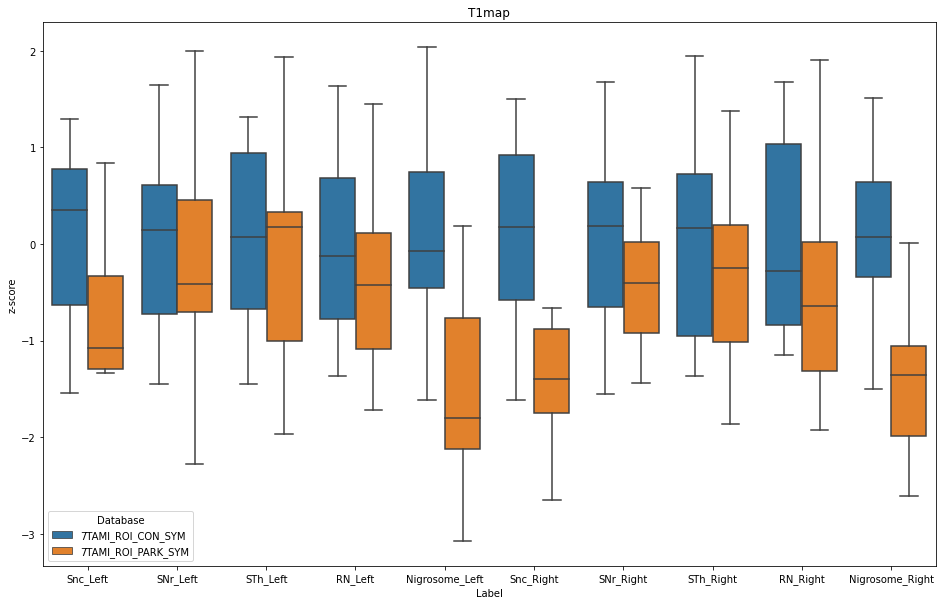

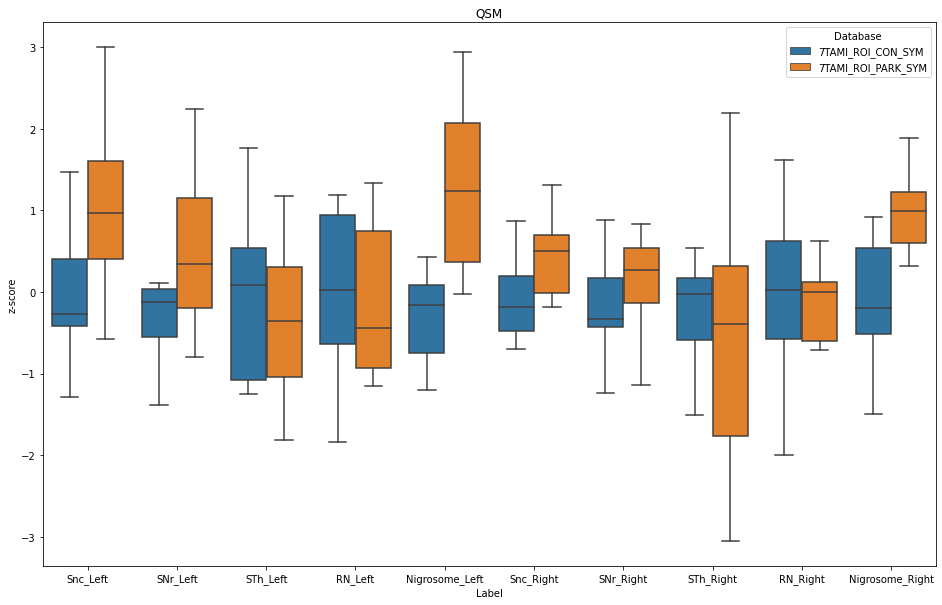

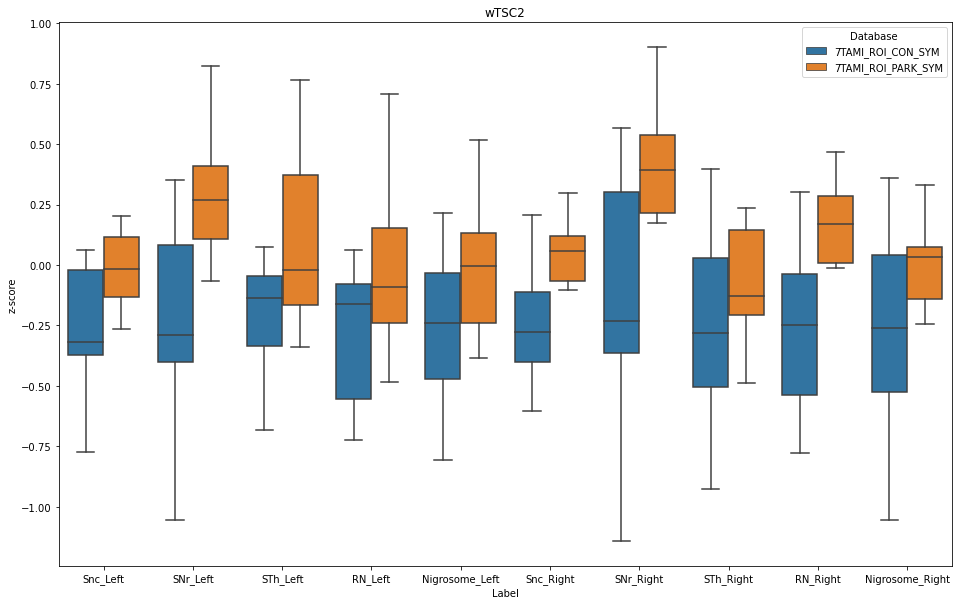

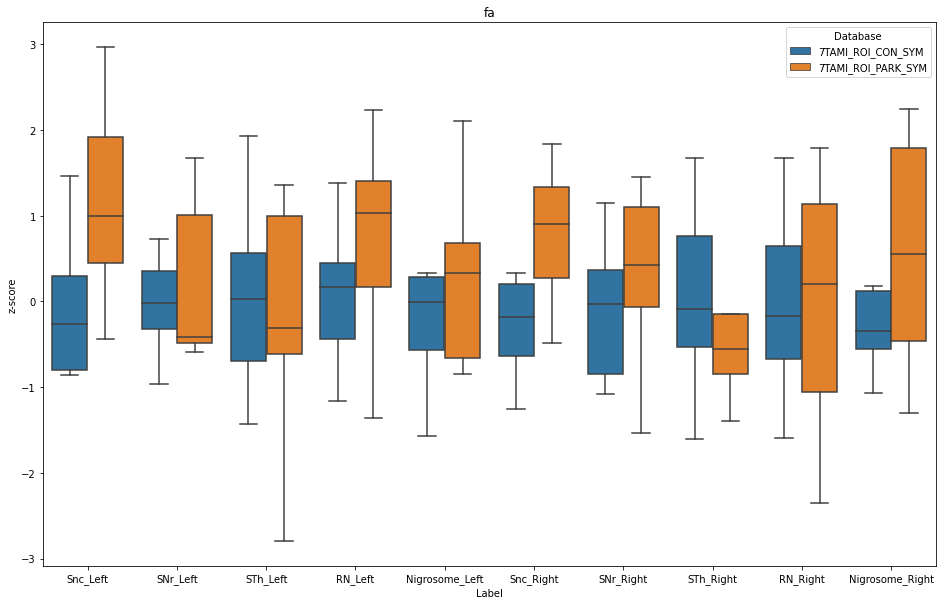

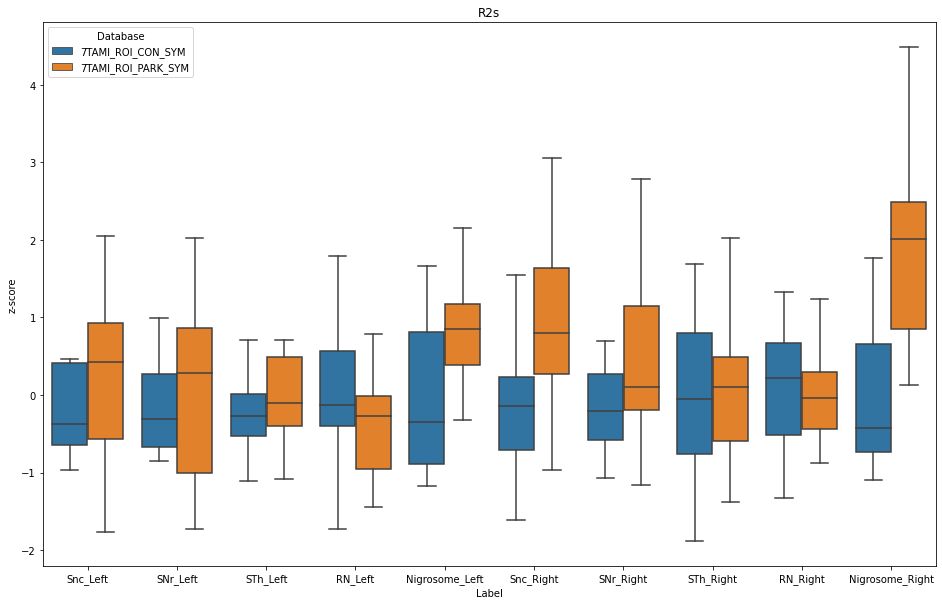

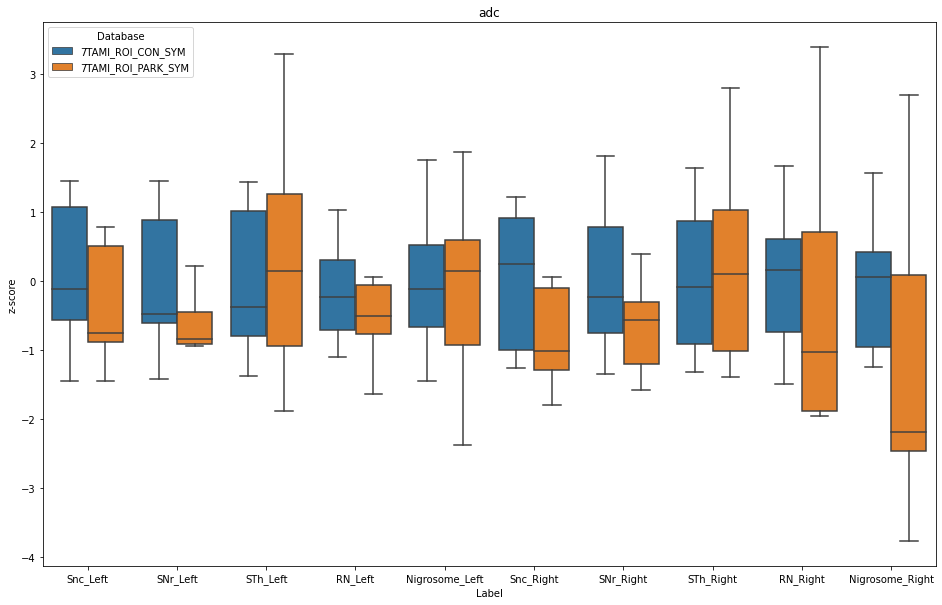

In [3]:
import seaborn as sns
from statannotations.Annotator import Annotator
    
for MODALITY in MODALITIES:
    
    plt.figure(figsize=(16,10))

    filter = (big_frame['Segmentation'] == "Direct_qT1/QSM/R2*_"+ATLAS) & (big_frame['Modality'] == MODALITY)

    x = "Label"
    y = "z-score"

    ax = sns.boxplot(data=big_frame[filter], x=x, y=y, hue='Database', showfliers=False)#, order=order)

    plt.title(MODALITY)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Nigrosome_Right_7TAMI_ROI_CON_SYM vs. Nigrosome_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:2.836e-03 U_stat=1.150e+02
RN_Right_7TAMI_ROI_CON_SYM vs. RN_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:2.815e-01 U_stat=8.400e+01
SNr_Left_7TAMI_ROI_CON_SYM vs. SNr_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:6.891e-01 U_stat=7.300e+01
Snc_Left_7TAMI_ROI_CON_SYM vs. Snc_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:1.316e-01 U_stat=9.100e+01
STh_Left_7TAMI_ROI_CON_SYM vs. STh_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:8.294e-01 U_stat=7.000e+01
RN_Left_7TAMI_ROI_CON_SYM vs. RN_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:3.099e-01 U_stat=8.300e+01
Nigrosome_Left_7TAMI_

Snc_Left_7TAMI_ROI_CON_SYM vs. Snc_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:3.744e-01 U_stat=6.700e+01
STh_Left_7TAMI_ROI_CON_SYM vs. STh_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.491e-01 U_stat=4.900e+01
RN_Left_7TAMI_ROI_CON_SYM vs. RN_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:3.744e-01 U_stat=6.700e+01
Nigrosome_Left_7TAMI_ROI_CON_SYM vs. Nigrosome_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:9.151e-01 U_stat=5.200e+01
Snc_Right_7TAMI_ROI_CON_SYM vs. Snc_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:3.604e-02 U_stat=8.400e+01
SNr_Right_7TAMI_ROI_CON_SYM vs. SNr_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:1.265e-01 U_stat=7.600e+01
STh_Right_7TAMI_ROI_CON_SYM vs. STh_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=5.400e+01


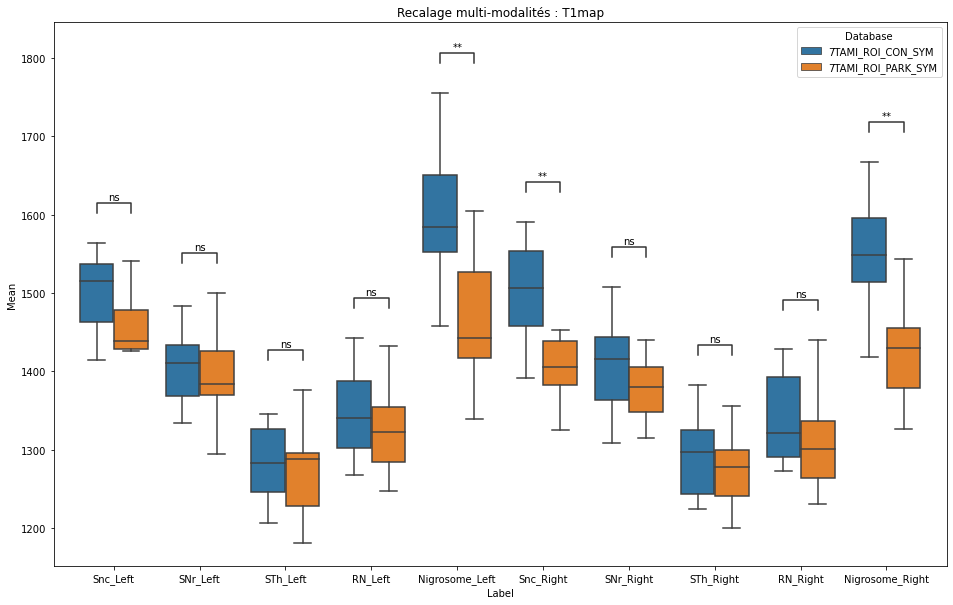

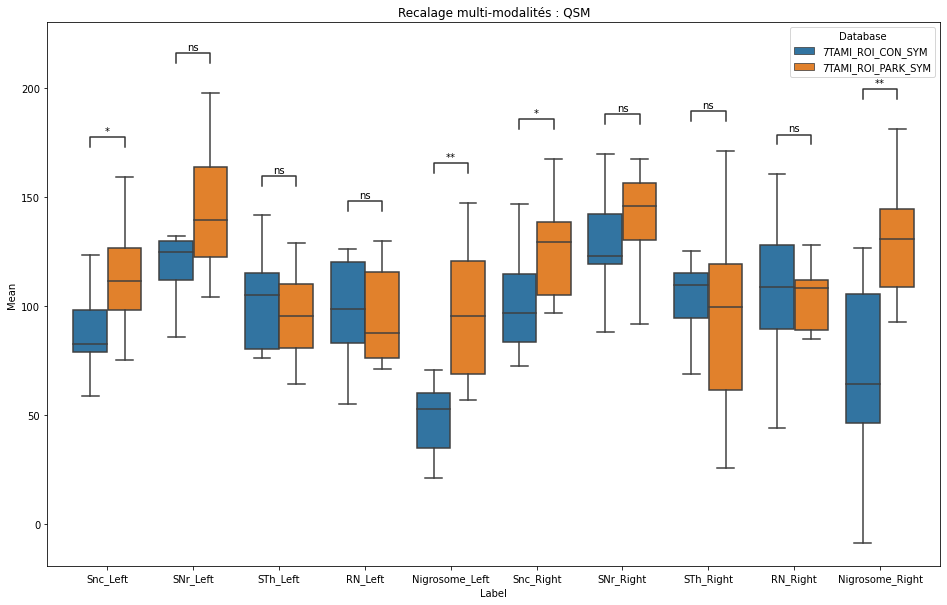

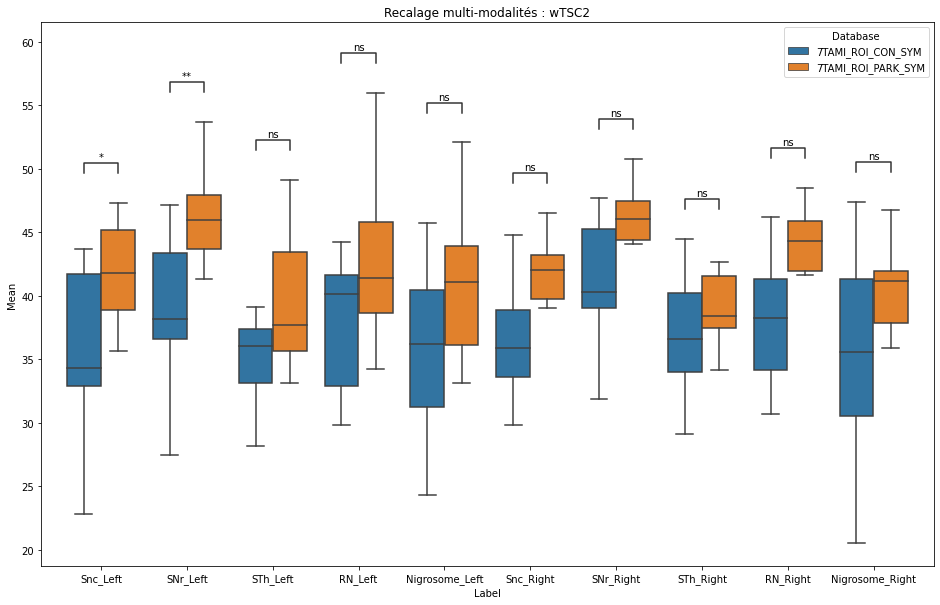

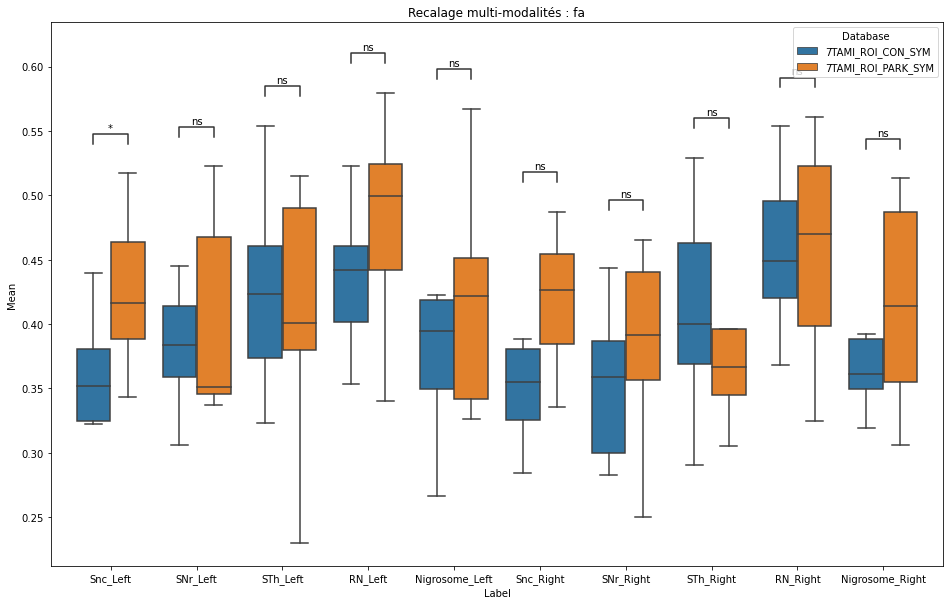

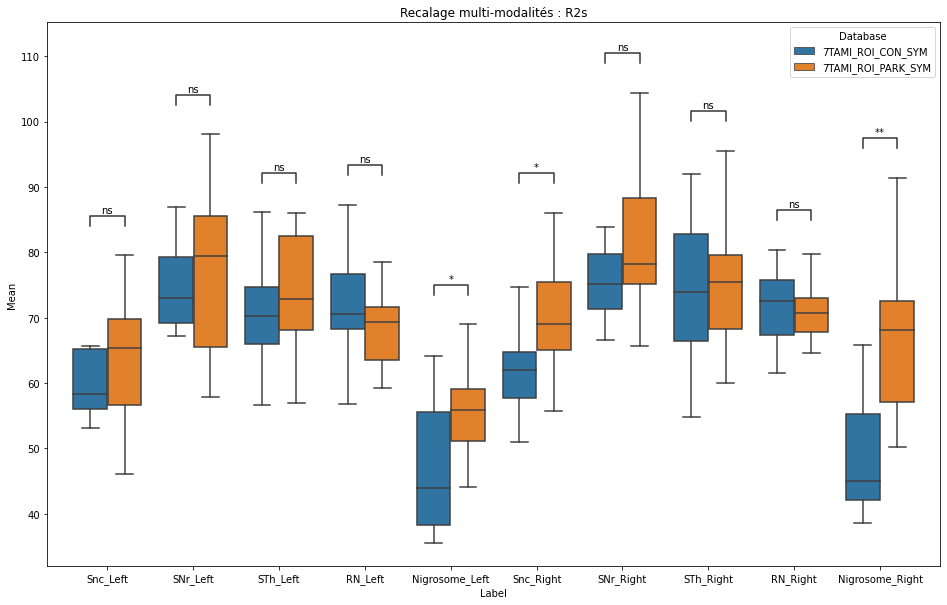

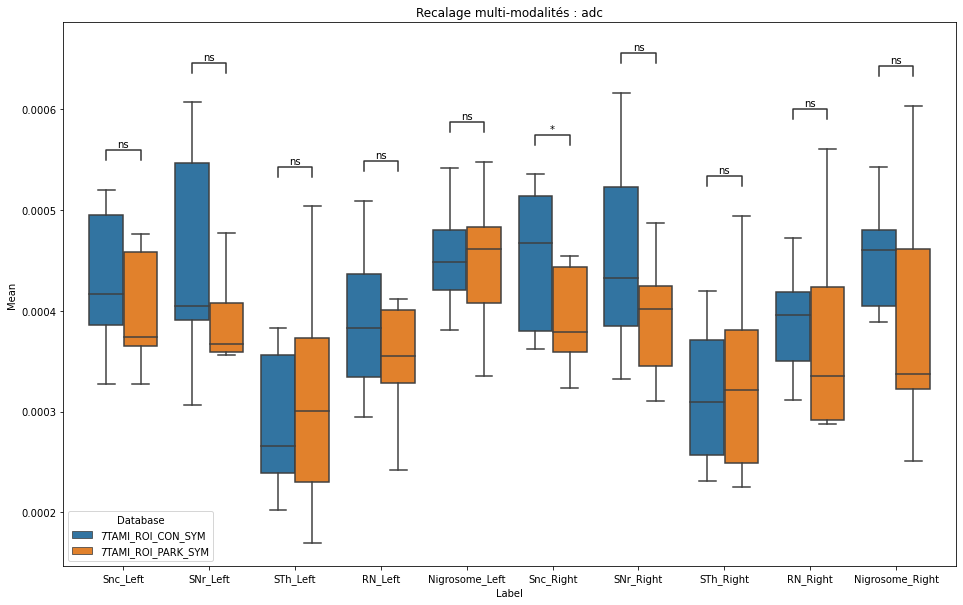

In [5]:
import seaborn as sns
from statannotations.Annotator import Annotator

i=0
FIGS=[]
for MODALITY in MODALITIES:
    
    FIGS+="fig"+str(i)
    FIGS[i] = plt.figure(figsize=(16,10))
    
    filter = (big_frame['Modality'] == MODALITY) & (big_frame['Segmentation'] == "Direct_qT1/QSM/R2*_"+ATLAS)
    df = big_frame[filter]
    
    x = "Label"
    y = "Mean"

    ax = sns.boxplot(data=df, x=x, y=y, hue='Database', showfliers=False)#, order=order)

    pairs=[(("Snc_Left", "7TAMI_ROI_CON_SYM"), ("Snc_Left", "7TAMI_ROI_PARK_SYM")),
          (("SNr_Left", "7TAMI_ROI_CON_SYM"), ("SNr_Left", "7TAMI_ROI_PARK_SYM")),
          (("STh_Left", "7TAMI_ROI_CON_SYM"), ("STh_Left", "7TAMI_ROI_PARK_SYM")),
          (("RN_Left", "7TAMI_ROI_CON_SYM"), ("RN_Left", "7TAMI_ROI_PARK_SYM")),
          (("Nigrosome_Left", "7TAMI_ROI_CON_SYM"), ("Nigrosome_Left", "7TAMI_ROI_PARK_SYM")),
          (("Snc_Right", "7TAMI_ROI_CON_SYM"), ("Snc_Right", "7TAMI_ROI_PARK_SYM")),
          (("SNr_Right", "7TAMI_ROI_CON_SYM"), ("SNr_Right", "7TAMI_ROI_PARK_SYM")),
          (("STh_Right", "7TAMI_ROI_CON_SYM"), ("STh_Right", "7TAMI_ROI_PARK_SYM")),
          (("RN_Right", "7TAMI_ROI_CON_SYM"), ("RN_Right", "7TAMI_ROI_PARK_SYM")),
          (("Nigrosome_Right", "7TAMI_ROI_CON_SYM"), ("Nigrosome_Right", "7TAMI_ROI_PARK_SYM"))]

    annotator = Annotator(ax, pairs, data=df, x="Label", y=y, hue='Database')#, order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
    annotator.apply_and_annotate()
    plt.title("Recalage multi-modalités : "+MODALITY)
    
    i+=1
    
from matplotlib.backends.backend_pdf import PdfPages
def multiple_figues(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

multiple_figues("Stats_qT1_QSM_R2s.pdf")

                Label         Mean       Sigma  Skewness  Kurtosis  Entropy  \
0            Snc_Left  1422.940000  136.137000  1.085770 -30.83500  5.64015   
1            SNr_Left  1319.500000  133.887000  0.371731  -1.66164  5.76469   
2            STh_Left  1179.770000   94.170800  1.032140  -8.39806  5.17013   
3             RN_Left  1273.740000   70.353000  0.579320 -30.51290  4.85266   
4      Nigrosome_Left  1531.040000  105.550000  0.395799  -4.64157  4.66170   
...               ...          ...         ...       ...       ...      ...   
2855        Snc_Right     0.000454    0.000145  0.657800 -20.20870  6.21230   
2856        SNr_Right     0.000487    0.000167  1.413030 -39.80150  6.42986   
2857        STh_Right     0.000430    0.000077  2.161240 -22.80380  5.09435   
2858         RN_Right     0.000424    0.000065  0.736218  49.69570  5.21759   
2859  Nigrosome_Right     0.000411    0.000062 -0.492767  -7.36312  4.67542   

               Sum         5th%        95th%       

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Nigrosome_Right_7TAMI_ROI_CON_SYM vs. Nigrosome_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:6.469e-03 U_stat=2.400e+01
RN_Right_7TAMI_ROI_CON_SYM vs. RN_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:9.538e-01 U_stat=7.000e+01
SNr_Left_7TAMI_ROI_CON_SYM vs. SNr_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:1.395e-01 U_stat=4.550e+01
Snc_Left_7TAMI_ROI_CON_SYM vs. Snc_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:2.048e-02 U_stat=3.100e+01
STh_Left_7TAMI_ROI_CON_SYM vs. STh_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:6.021e-01 U_stat=8.100e+01
RN_Left_7TAMI_ROI_CON_SYM vs. RN_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:6.851e-01 U_stat=6.400e+01
Nigrosome_Left_7TAMI_

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Nigrosome_Right_7TAMI_ROI_CON_SYM vs. Nigrosome_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:2.410e-01 U_stat=3.700e+01
RN_Right_7TAMI_ROI_CON_SYM vs. RN_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:9.717e-01 U_stat=5.300e+01
SNr_Left_7TAMI_ROI_CON_SYM vs. SNr_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:5.458e-01 U_stat=4.500e+01
Snc_Left_7TAMI_ROI_CON_SYM vs. Snc_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:3.604e-02 U_stat=2.400e+01
STh_Left_7TAMI_ROI_CON_SYM vs. STh_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:8.590e-01 U_stat=5.700e+01
RN_Left_7TAMI_ROI_CON_SYM vs. RN_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:2.707e-01 U_stat=3.800e+01
Nigrosome_Left_7TAMI_

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Nigrosome_Right_7TAMI_ROI_CON_SYM vs. Nigrosome_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:8.166e-02 U_stat=7.900e+01
RN_Right_7TAMI_ROI_CON_SYM vs. RN_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:3.028e-01 U_stat=6.900e+01
SNr_Left_7TAMI_ROI_CON_SYM vs. SNr_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:2.136e-01 U_stat=7.200e+01
Snc_Left_7TAMI_ROI_CON_SYM vs. Snc_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:4.138e-01 U_stat=6.600e+01
STh_Left_7TAMI_ROI_CON_SYM vs. STh_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:4.555e-01 U_stat=4.300e+01
RN_Left_7TAMI_ROI_CON_SYM vs. RN_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:3.374e-01 U_stat=6.800e+01
Nigrosome_Left_7TAMI_

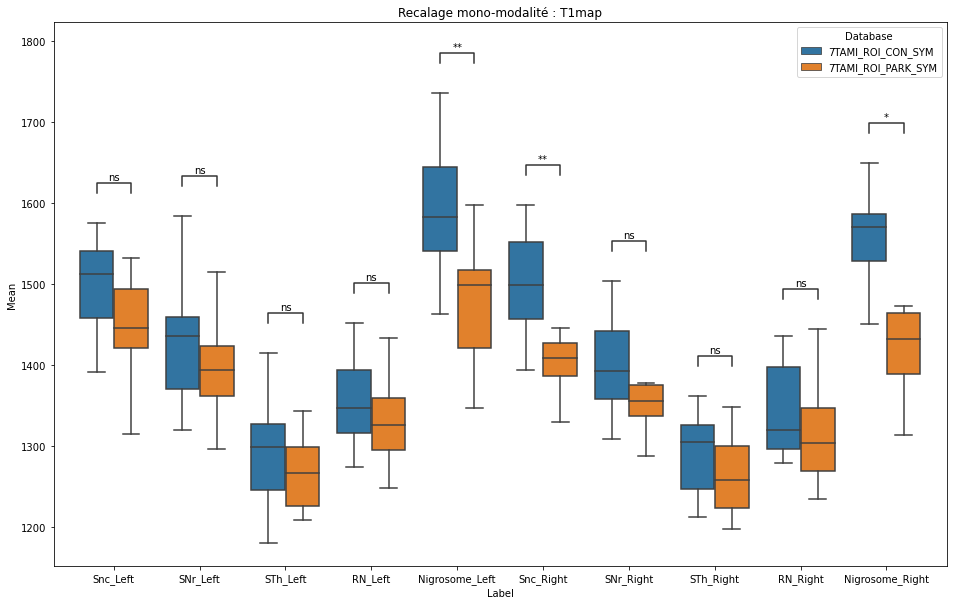

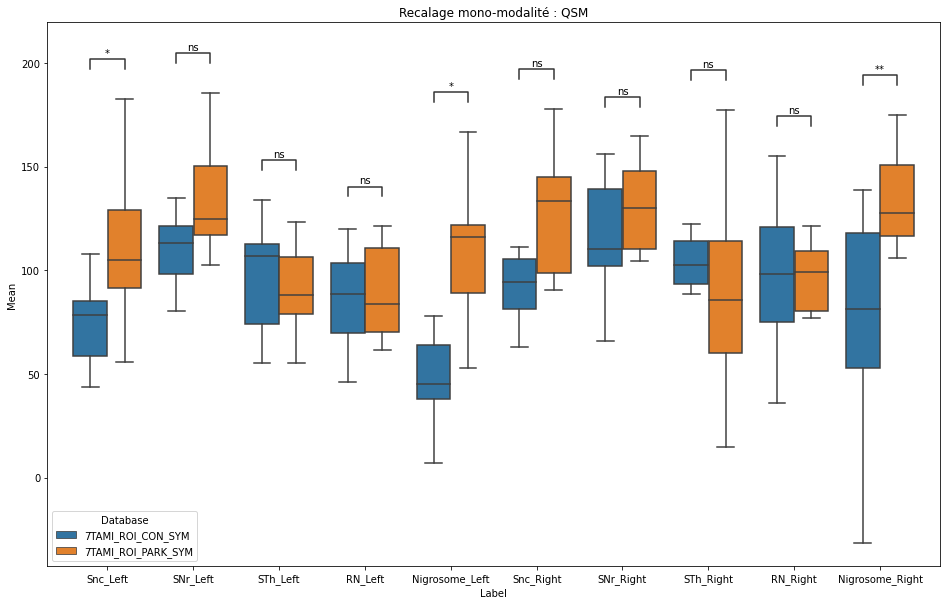

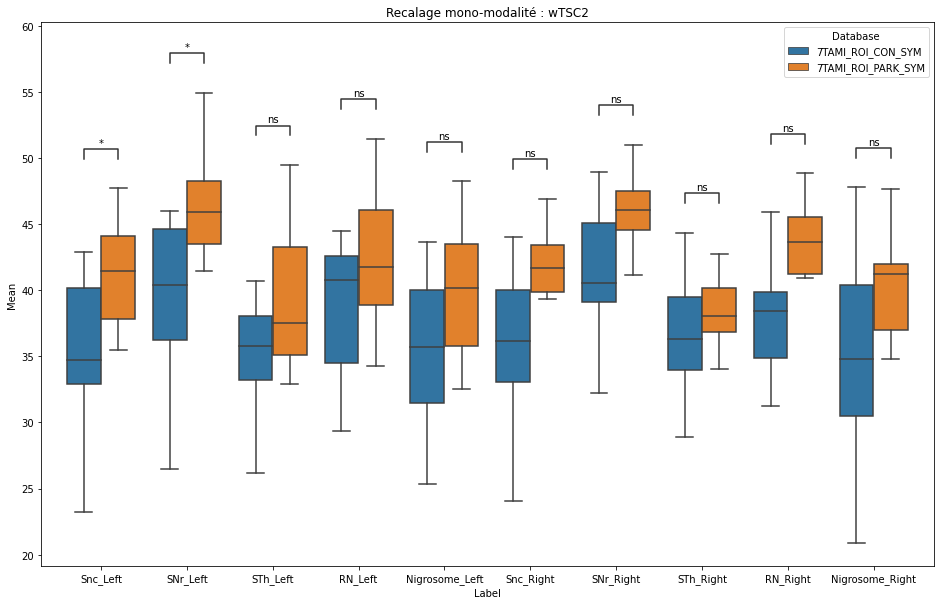

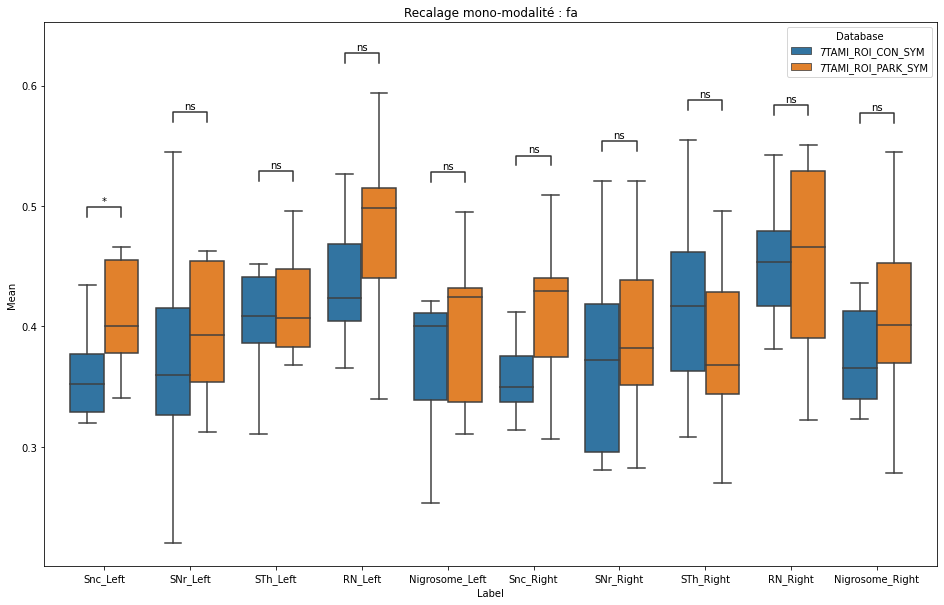

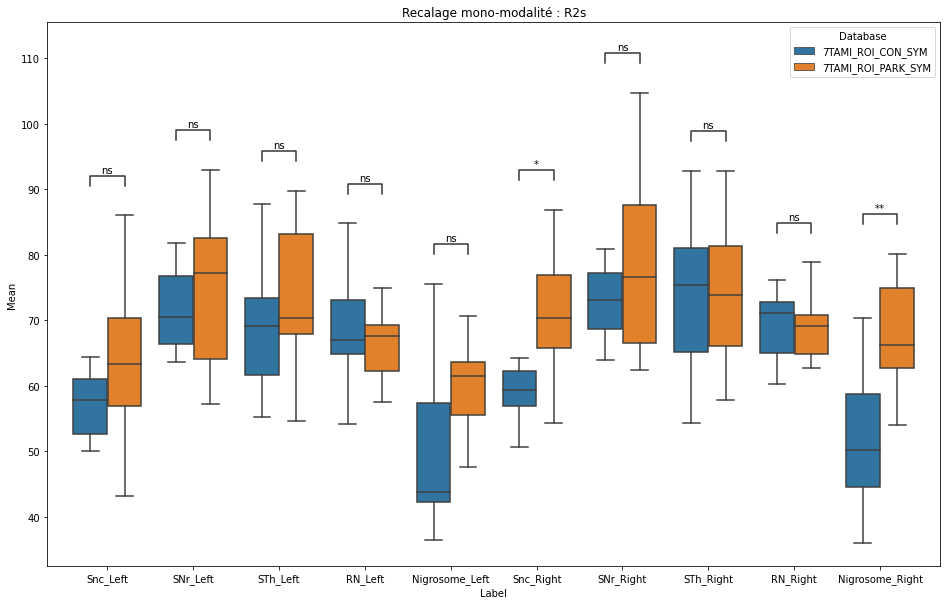

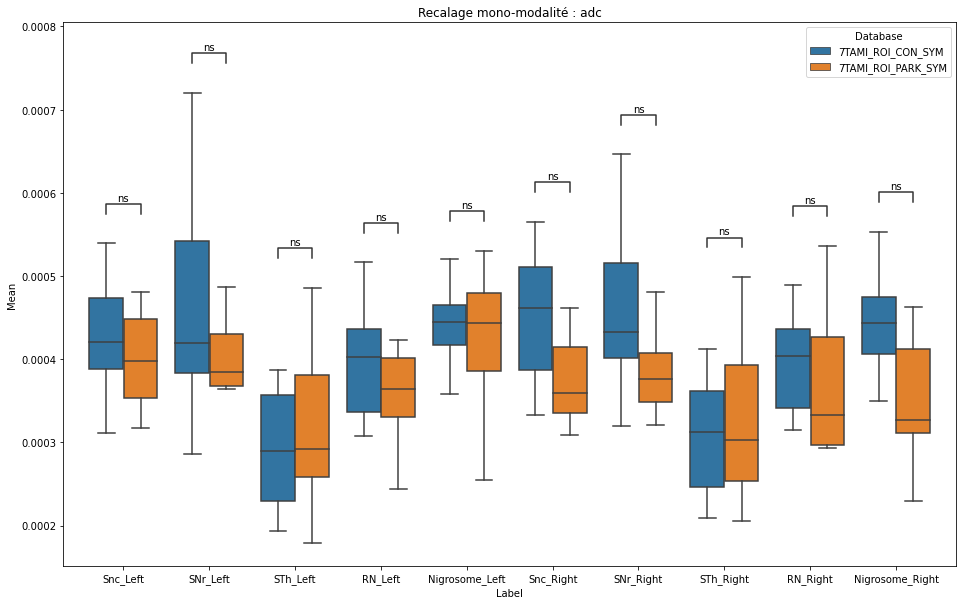

In [6]:
import seaborn as sns
from statannotations.Annotator import Annotator

i=0
FIGS=[]
for MODALITY in MODALITIES:
    
    FIGS+="fig"+str(i)
    FIGS[i] = plt.figure(figsize=(16,10))
    
    print(big_frame)
    filter = (big_frame['Modality'] == MODALITY) & (big_frame['Segmentation'] == "Direct_qT1_"+ATLAS)
    df = big_frame[filter]
    
    x = "Label"
    y = "Mean"

    ax = sns.boxplot(data=df, x=x, y=y, hue='Database', showfliers=False)#, order=order)

    pairs=[(("Snc_Left", "7TAMI_ROI_CON_SYM"), ("Snc_Left", "7TAMI_ROI_PARK_SYM")),
          (("SNr_Left", "7TAMI_ROI_CON_SYM"), ("SNr_Left", "7TAMI_ROI_PARK_SYM")),
          (("STh_Left", "7TAMI_ROI_CON_SYM"), ("STh_Left", "7TAMI_ROI_PARK_SYM")),
          (("RN_Left", "7TAMI_ROI_CON_SYM"), ("RN_Left", "7TAMI_ROI_PARK_SYM")),
          (("Nigrosome_Left", "7TAMI_ROI_CON_SYM"), ("Nigrosome_Left", "7TAMI_ROI_PARK_SYM")),
          (("Snc_Right", "7TAMI_ROI_CON_SYM"), ("Snc_Right", "7TAMI_ROI_PARK_SYM")),
          (("SNr_Right", "7TAMI_ROI_CON_SYM"), ("SNr_Right", "7TAMI_ROI_PARK_SYM")),
          (("STh_Right", "7TAMI_ROI_CON_SYM"), ("STh_Right", "7TAMI_ROI_PARK_SYM")),
          (("RN_Right", "7TAMI_ROI_CON_SYM"), ("RN_Right", "7TAMI_ROI_PARK_SYM")),
          (("Nigrosome_Right", "7TAMI_ROI_CON_SYM"), ("Nigrosome_Right", "7TAMI_ROI_PARK_SYM"))]

    annotator = Annotator(ax, pairs, data=df, x="Label", y=y, hue='Database')#, order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
    annotator.apply_and_annotate()
    plt.title("Recalage mono-modalité : "+MODALITY)
    
    i+=1
    
from matplotlib.backends.backend_pdf import PdfPages
def multiple_figues(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()
    
multiple_figues("Stats_qT1only.pdf")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Nigrosome_Right_7TAMI_ROI_CON_SYM vs. Nigrosome_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=5.350e+01
RN_Right_7TAMI_ROI_CON_SYM vs. RN_Right_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:2.136e-01 U_stat=3.600e+01
SNr_Left_7TAMI_ROI_CON_SYM vs. SNr_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:3.374e-01 U_stat=4.000e+01
Snc_Left_7TAMI_ROI_CON_SYM vs. Snc_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:4.342e-01 U_stat=4.250e+01
STh_Left_7TAMI_ROI_CON_SYM vs. STh_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.223e-01 U_stat=4.850e+01
RN_Left_7TAMI_ROI_CON_SYM vs. RN_Left_7TAMI_ROI_PARK_SYM: Mann-Whitney-Wilcoxon test two-sided, P_val:1.098e-01 U_stat=3.100e+01
Nigrosome_Left_7TAMI_

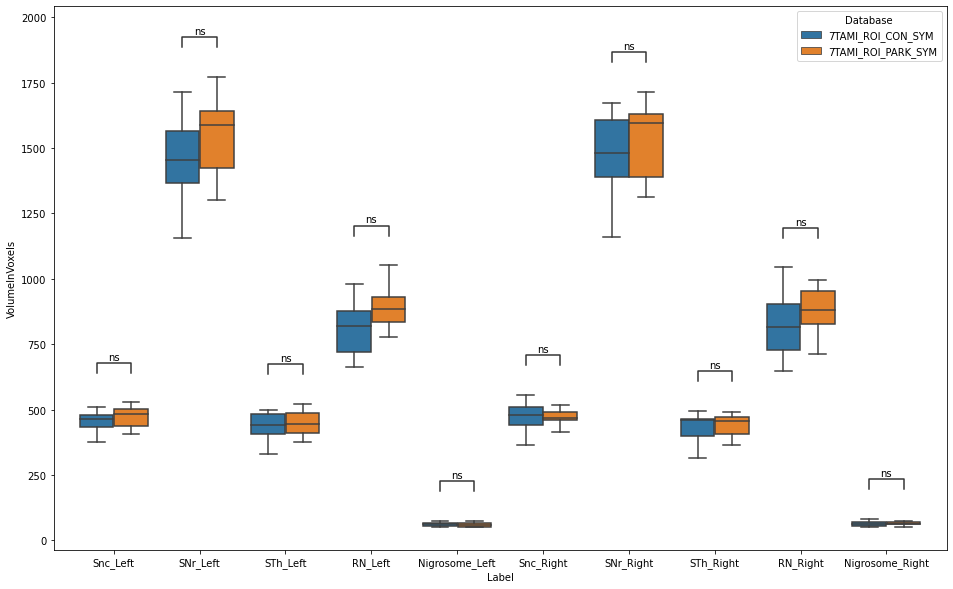

In [7]:
import seaborn as sns
from statannotations.Annotator import Annotator

i=0
    
plt.figure(figsize=(16,10))
    
filter = (big_frame['Modality'] == MODALITY) & (big_frame['Segmentation'] == "Direct_qT1/QSM/R2*_"+ATLAS)
df = big_frame[filter]
    
x = "Label"
y = "VolumeInVoxels"

ax = sns.boxplot(data=df, x=x, y=y, hue='Database', showfliers=False)#, order=order)

pairs=[(("Snc_Left", "7TAMI_ROI_CON_SYM"), ("Snc_Left", "7TAMI_ROI_PARK_SYM")),
       (("SNr_Left", "7TAMI_ROI_CON_SYM"), ("SNr_Left", "7TAMI_ROI_PARK_SYM")),
       (("STh_Left", "7TAMI_ROI_CON_SYM"), ("STh_Left", "7TAMI_ROI_PARK_SYM")),
       (("RN_Left", "7TAMI_ROI_CON_SYM"), ("RN_Left", "7TAMI_ROI_PARK_SYM")),
       (("Nigrosome_Left", "7TAMI_ROI_CON_SYM"), ("Nigrosome_Left", "7TAMI_ROI_PARK_SYM")),
       (("Snc_Right", "7TAMI_ROI_CON_SYM"), ("Snc_Right", "7TAMI_ROI_PARK_SYM")),
       (("SNr_Right", "7TAMI_ROI_CON_SYM"), ("SNr_Right", "7TAMI_ROI_PARK_SYM")),
       (("STh_Right", "7TAMI_ROI_CON_SYM"), ("STh_Right", "7TAMI_ROI_PARK_SYM")),
       (("RN_Right", "7TAMI_ROI_CON_SYM"), ("RN_Right", "7TAMI_ROI_PARK_SYM")),
       (("Nigrosome_Right", "7TAMI_ROI_CON_SYM"), ("Nigrosome_Right", "7TAMI_ROI_PARK_SYM"))]

annotator = Annotator(ax, pairs, data=df, x="Label", y=y, hue='Database')#, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator.apply_and_annotate()
    
i+=1
    
from matplotlib.backends.backend_pdf import PdfPages
def multiple_figues(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()
    
multiple_figues("Volumes_qT1_QSM_R2s.pdf")